In [7]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_squared_error

#loading dataset
ct_data=pd.read_csv(r'/Users/Sindhuja_reddy/Downloads/superconduct/train.csv')


In [8]:
ct_data.head(5)

,number_of_elements,mean_atomic_mass,wtd_mean_atomic_mass,gmean_atomic_mass,wtd_gmean_atomic_mass,entropy_atomic_mass,wtd_entropy_atomic_mass,range_atomic_mass,wtd_range_atomic_mass,std_atomic_mass,...,wtd_mean_Valence,gmean_Valence,wtd_gmean_Valence,entropy_Valence,wtd_entropy_Valence,range_Valence,wtd_range_Valence,std_Valence,wtd_std_Valence,critical_temp
0,4,88.944468,57.862692,66.361592,36.116612,1.181795,1.062396,122.90607,31.794921,51.968828,...,2.257143,2.213364,2.219783,1.368922,1.066221,1,1.085714,0.433013,0.437059,29.0
1,5,92.729214,58.518416,73.132787,36.396602,1.449309,1.057755,122.90607,36.161939,47.094633,...,2.257143,1.888175,2.210679,1.557113,1.047221,2,1.128571,0.632456,0.468606,26.0
2,4,88.944468,57.885242,66.361592,36.122509,1.181795,0.975980,122.90607,35.741099,51.968828,...,2.271429,2.213364,2.232679,1.368922,1.029175,1,1.114286,0.433013,0.444697,19.0
3,4,88.944468,57.873967,66.361592,36.119560,1.181795,1.022291,122.90607,33.768010,51.968828,...,2.264286,2.213364,2.226222,1.368922,1.048834,1,1.100000,0.433013,0.440952,22.0
4,4,88.944468,57.840143,66.361592,36.110716,1.181795,1.129224,122.90607,27.848743,51.968828,...,2.242857,2.213364,2.206963,1.368922,1.096052,1,1.057143,0.433013,0.428809,23.0


In [9]:
ct_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21263 entries, 0 to 21262
Data columns (total 82 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   number_of_elements               21263 non-null  int64  
 1   mean_atomic_mass                 21263 non-null  float64
 2   wtd_mean_atomic_mass             21263 non-null  float64
 3   gmean_atomic_mass                21263 non-null  float64
 4   wtd_gmean_atomic_mass            21263 non-null  float64
 5   entropy_atomic_mass              21263 non-null  float64
 6   wtd_entropy_atomic_mass          21263 non-null  float64
 7   range_atomic_mass                21263 non-null  float64
 8   wtd_range_atomic_mass            21263 non-null  float64
 9   std_atomic_mass                  21263 non-null  float64
 10  wtd_std_atomic_mass              21263 non-null  float64
 11  mean_fie                         21263 non-null  float64
 12  wtd_mean_fie      

In [11]:
#x nd y define
x=ct_data.drop(['critical_temp'],axis=1).values
y=ct_data['critical_temp'].values

In [12]:
print(x)


[[ 4.         88.9444675  57.86269229 ...  1.08571429  0.4330127
   0.43705882]
 [ 5.         92.729214   58.51841614 ...  1.12857143  0.63245553
   0.46860627]
 [ 4.         88.9444675  57.88524186 ...  1.11428571  0.4330127
   0.44469664]
 ...
 [ 2.         99.66319    95.609104   ...  3.2         0.5
   0.4       ]
 [ 2.         99.66319    97.0956022  ...  2.21        0.5
   0.46249324]
 [ 3.         87.46833333 86.8585     ...  1.8         1.41421356
   1.5       ]]


In [13]:
print(y)

[29.   26.   19.   ...  1.98  1.84 12.8 ]


In [14]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0,shuffle=True)

In [36]:
#ordinary least squares
least_square=sm.OLS(y_train,x_train).fit(fit_intercept=True, normalize='deprecated', copy_X=True, n_jobs=None, positive=False)

In [16]:
print(least_square.params)

[-3.34868044e+00  8.26673001e-01 -9.21133283e-01 -5.07207228e-01
  6.66917164e-01 -3.34802360e+01  3.43218100e+00  2.06234956e-01
  2.52824550e-02 -5.31181225e-01  8.24485865e-02  1.49254153e-01
 -2.15248309e-01 -1.50217208e-01  2.29895330e-01 -1.11107276e+02
  4.23822108e+01  6.97751546e-02  2.10085409e-02 -2.13697110e-01
 -7.43627578e-03 -4.79683455e-01  3.24227383e+00  1.09962882e-01
 -2.87291527e+00  7.45283553e+01  4.51263352e+01  1.89038849e-01
 -8.72072479e-02 -3.16546940e-01 -3.51992475e-01 -4.47088297e-03
 -1.46567411e-04  1.29258613e-03  2.20577841e-03  1.45376618e+01
 -1.85598632e+01 -1.55067485e-03  9.38702583e-05  6.18030163e-03
 -1.70047883e-03 -9.62179317e-02  5.31876381e-01  1.68658072e-01
 -5.81640481e-01  3.74165869e+00 -2.12385984e+01 -3.55949171e-01
 -1.37998838e-01  1.21395201e+00 -5.49822125e-01  1.68632039e+00
 -1.83227593e+00 -1.52384024e+00  1.51966696e+00 -1.96441256e+01
  2.47286750e+01 -3.35829581e-01  6.10552794e-01 -6.46214925e-01
  6.86763920e-01 -8.53603

In [37]:
#summary
least_square.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                         Results: Ordinary least squares
=================================================================================
Model:                  OLS              Adj. R-squared (uncentered): 0.868      
Dependent Variable:     y                AIC:                         145942.4636
Date:                   2022-10-16 16:41 BIC:                         146569.5297
No. Observations:       17010            Log-Likelihood:              -72890.    
Df Model:               81               F-statistic:                 1387.      
Df Residuals:           16929            Prob (F-statistic):          0.00       
R-squared (uncentered): 0.869            Scale:                       310.19     
-------------------------------------------------------------------------------------
              Coef.       Std.Err.        t         P>|t|        [0.025       0.975] 
-------------------------------------------------------------------------------------
x1            -3.3487       0.8392      -3.9902     0.0001       -4.9936      -1.7037
x2             0.8267       0.0926       8.9283     0.0000        0.6452       1.0082
x3            -0.9211       0.1150      -8.0081     0.0000       -1.1466      -0.6957
x4            -0.5072       0.0919      -5.5219     0.0000       -0.6873      -0.3272
x5             0.6669       0.1093       6.1025     0.0000        0.4527       0.8811
x6           -33.4802       5.0749      -6.5972     0.0000      -43.4276     -23.5329
x7             3.4322       4.0706       0.8432     0.3992       -4.5467      11.4110
x8             0.2062       0.0185      11.1687     0.0000        0.1700       0.2424
x9             0.0253       0.0246       1.0279     0.3040       -0.0229       0.0735
x10           -0.5312       0.0704      -7.5487     0.0000       -0.6691      -0.3933
x11            0.0824       0.0611       1.3495     0.1772       -0.0373       0.2022
x12            0.1493       0.0706       2.1133     0.0346        0.0108       0.2877
x13           -0.2152       0.0851      -2.5294     0.0114       -0.3821      -0.0484
x14           -0.1502       0.0694      -2.1649     0.0304       -0.2862      -0.0142
x15            0.2299       0.0842       2.7302     0.0063        0.0648       0.3949
x16         -111.1073      22.6003      -4.9162     0.0000     -155.4063     -66.8083
x17           42.3822       5.3522       7.9187     0.0000       31.8914      52.8730
x18            0.0698       0.0071       9.7661     0.0000        0.0558       0.0838
x19            0.0210       0.0041       5.1835     0.0000        0.0131       0.0290
x20           -0.2137       0.0248      -8.6190     0.0000       -0.2623      -0.1651
x21           -0.0074       0.0227      -0.3282     0.7427       -0.0518       0.0370
x22           -0.4797       0.2035      -2.3570     0.0184       -0.8786      -0.0808
x23            3.2423       0.2716      11.9359     0.0000        2.7098       3.7747
x24            0.1100       0.2036       0.5401     0.5891       -0.2891       0.5090
x25           -2.8729       0.2655     -10.8218     0.0000       -3.3933      -2.3526
x26           74.5284      19.5476       3.8127     0.0001       36.2130     112.8437
x27           45.1263       5.9553       7.5775     0.0000       33.4533      56.7994
x28            0.1890       0.0247       7.6522     0.0000        0.1406       0.2375
x29           -0.0872       0.0178      -4.9016     0.0000       -0.1221      -0.0523
x30           -0.3165       0.1102      -2.8721     0.0041       -0.5326      -0.1005
x31           -0.3520       0.0992      -3.5475     0.0004       -0.5465      -0.1575
x32           -0.0045       0.0006      -8.0129     0.0000       -0.0056      -0.0034
x33           -0.0001       0.0007      -0.2139     0.8306       -0.0015       0.0012
x34            0.0013       0.0005       2.4394     0.0147        0.0003       0.0023
x35            0.0022       0.0007       3.3756     0.00

In [38]:
y_predict_test=least_square.predict(x_test)


In [46]:
#r square for train data
#LR.predict([[4,88.944468,57.862692,66.361592,36.116612,1.181795,1.062396,122.90607,31.794921,51.968828,53.6225345301219,775.425,1010.26857142857,718.15289995213,938.016780052204,1.30596703599158,0.791487788469155,810.6,735.985714285714,323.811807806633,355.562966713294,160.25,105.514285714286,136.126003095455,84.528422716633,1.25924397214289,1.20703998701461,205,42.9142857142857,75.2375404967494,69.2355694829807,4654.35725,2961.50228571429,724.953210852388,53.5438109235142,1.03312880053102,0.814598190091683,8958.571,1579.58342857143,3306.1628967555,3572.59662370838,81.8375,111.7271429,60.12317856,99.41468205,1.159686593,0.787381691,127.05,80.98714286,51.43371189,42.55839575,6.9055,3.846857143,3.479474849,1.040985986,1.088575342,0.994998193,12.878,1.744571429,4.599064117,4.666919554,107.756645,61.01518857,7.06248773,0.621979487,0.30814799,0.262848266,399.97342,57.12766857,168.8542438,138.5171625,2.25,2.257143,2.213364,2.219783,1.368922,1.066221,1,1.085714,0.433013,0.437059]])
#predict values train and test data
np.abs(r2_score(y_test,y_predict_test))

0.7346610436788801

In [21]:
#from sklearn.metrics import r2_score
#r2_score(y_test,y_predict)

In [41]:
#calculating root mean square error
np.sqrt(mean_squared_error(y_train,y_predict_train))

17.570150919228254

In [42]:
np.sqrt(mean_squared_error(y_test,y_predict_test))

17.573543292505292

Text(0.5, 1.0, 'Actual vs. Predicted')

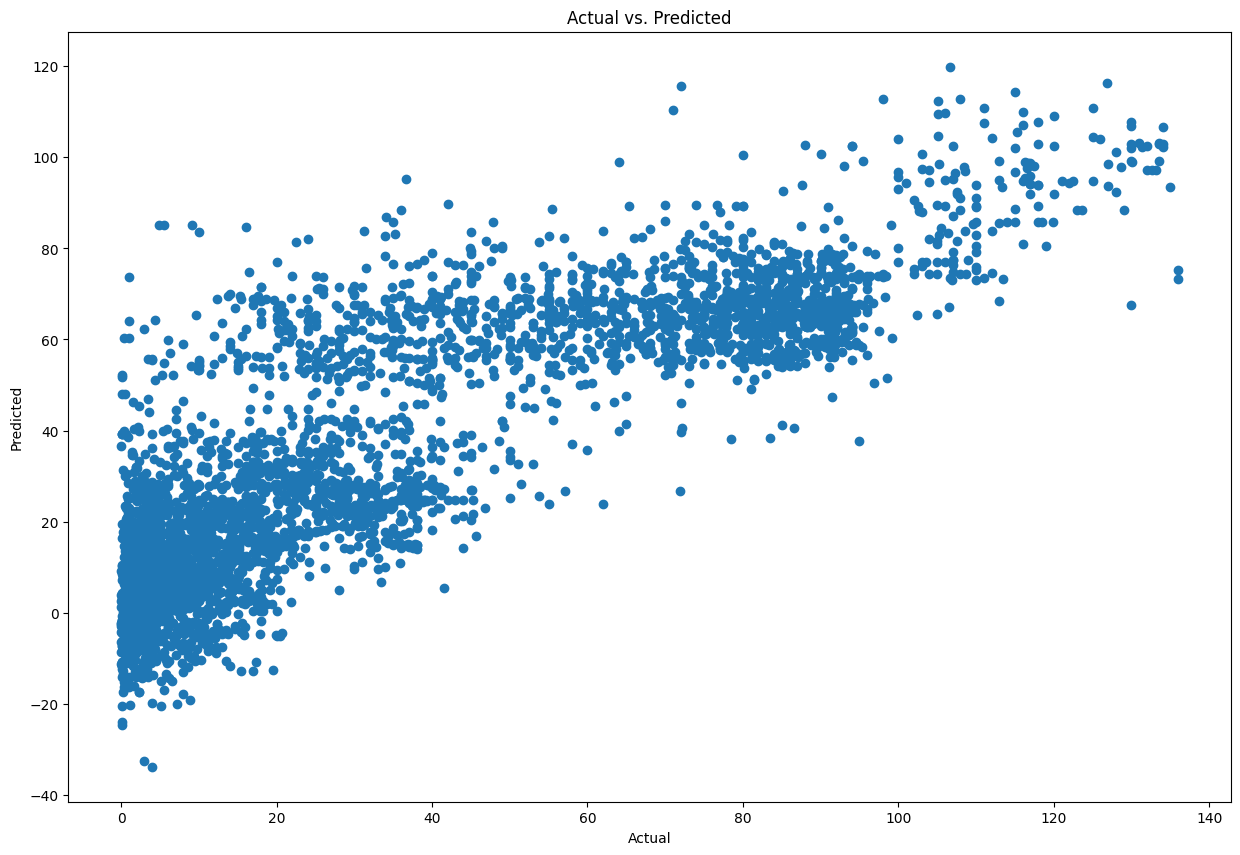

In [43]:
import matplotlib.pyplot as plot
plot.figure(figsize=(15,10))
plot.scatter(y_test,y_predict_test)
plot.xlabel('Actual')
plot.ylabel('Predicted')
plot.title('Actual vs. Predicted')

C:\Users\Sindhuja_reddy\AppData\Local\Temp\ipykernel_14120\2467054892.py:3: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([y_train.min(),y_train.max()],[y_train.min(),y_train.max()],'k--',c='blue',lw=3)


Text(0.5, 1.0, 'Actual vs. Predicted')

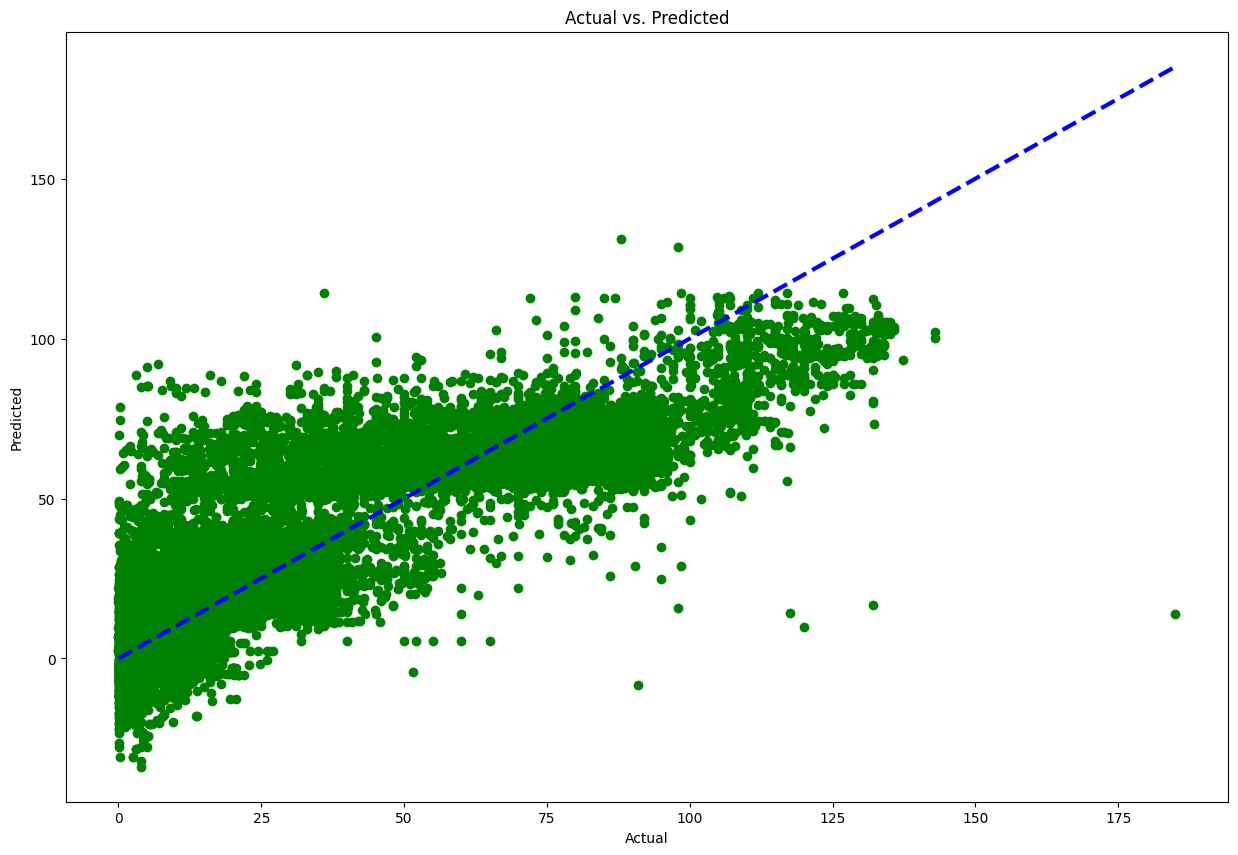

In [44]:
plot.figure(figsize=(15,10))
plot.scatter(y_train,y_predict_train,c='green')
plt.plot([y_train.min(),y_train.max()],[y_train.min(),y_train.max()],'k--',c='blue',lw=3)
plot.xlabel('Actual')
plot.ylabel('Predicted')
plot.title('Actual vs. Predicted')

C:\Users\Sindhuja_reddy\AppData\Local\Temp\ipykernel_14120\546327600.py:3: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([y_test.min(),y_test.max()],[y_test.min(),y_test.max()],'k--',c='blue',lw=3)


Text(0.5, 1.0, 'Actual vs. Predicted')

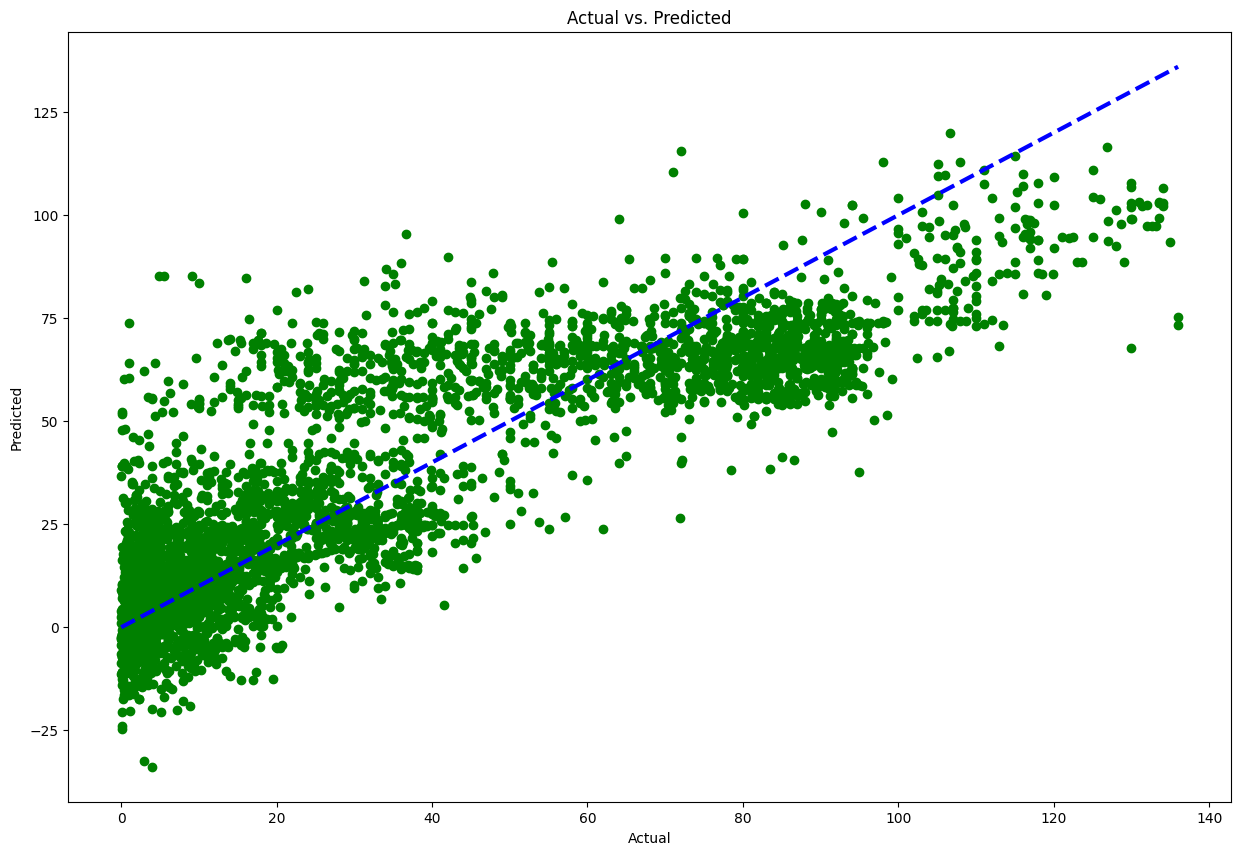

In [49]:
plot.figure(figsize=(15,10))
plot.scatter(y_test,y_predict_test,c='green')
plt.plot([y_test.min(),y_test.max()],[y_test.min(),y_test.max()],'k--',c='blue',lw=3)
plot.xlabel('Actual')
plot.ylabel('Predicted')
plot.title('Actual vs. Predicted')

In [45]:
predict_y_data=pd.DataFrame({'Actual Value':y_test,'Predicted value':y_predict_test,'Difference':y_test-y_predict_test})
predict_y_data[0:20]

,Actual Value,Predicted value,Difference
0,85.00,73.904913,11.095087
1,85.50,69.403450,16.096550
2,11.60,17.563640,-5.963640
3,16.00,56.378901,-40.378901
4,107.00,76.427620,30.572380
5,10.00,-4.712233,14.712233
6,4.60,8.538000,-3.938000
7,10.80,19.601217,-8.801217
8,11.00,-7.250092,18.250092
9,90.80,73.627021,17.172979
